# Pairwise AUC figure

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io

In [34]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'sngp',  'prood', 'atom',  'oe', 'rowl', 'csi', 'vit_hf_md']
l_algo = l_model
dataset = 'svhn'
l_data = []
for m1 in l_model:  # detector
    l_row = []
    for m2 in l_model:  # target
        s = f'../results/CIFAR10/pairwise/{m1}/{m2}/{dataset}_pgstylegan2_z16_mh/auc.txt'
        # s = f'../results_attack/pairwise/{dataset}/stylegan2/cifar_{m1}/cifar_{m2}_{dataset}_stylegan2_mh_auc.txt'
        f = float(open(s, 'r').read())
        l_row.append(f)
    l_data.append(l_row)
    
df = pd.DataFrame(np.array(l_data).T)
df.columns = l_model
df.index = l_model
mat = df.values
for i in range(len(l_model)):
    mat[i,i] = -1
masked_mat = np.ma.masked_where(mat==-1, mat)
masked_mat_svhn = masked_mat

In [35]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'sngp',  'prood', 'atom',  'oe', 'rowl', 'csi', 'vit_hf_md']
l_algo = l_model
dataset = 'celeba'
l_data = []
for m1 in l_model:  # detector
    l_row = []
    for m2 in l_model:  # target
        s = f'../results/CIFAR10/pairwise/{m1}/{m2}/{dataset}_pgstylegan2_z16_mh/auc.txt'
        # s = f'../results_attack/pairwise/{dataset}/stylegan2/cifar_{m1}/cifar_{m2}_{dataset}_stylegan2_mh_auc.txt'
        f = float(open(s, 'r').read())
        l_row.append(f)
    l_data.append(l_row)
    
df = pd.DataFrame(np.array(l_data).T)
df.columns = l_model
df.index = l_model
mat = df.values
for i in range(len(l_model)):
    mat[i,i] = -1
masked_mat = np.ma.masked_where(mat==-1, mat)
masked_mat_celeba = masked_mat

In [4]:
# a = '''	nae	good	acet	ceda	ssd	md	oe	csi
# nae		0.8632412401	0.9200435462	0.9331068339	0.9830595878	0.935094864	0.97155185	0.988617503
# good	0.8776108215		0.8770841995	0.8313372171	0.9451873009	0.9563898324	0.8577325566	0.9889435708
# acet	0.9637173174	0.908019867		0.5196149613	0.8235816897	0.794974411	0.9496275917	0.9315956244
# ceda	0.9705786359	0.8983611836	0.7448454697		0.8780151287	0.7625824557	0.9439381561	0.9334494316
# ssd	0.9806234169	0.9333506266	0.9293097744	0.8849810025		0.8255924561	0.9844715706	0.9177048037
# md	0.9953093624	0.9509636272	0.9653420372	0.9530215398	0.9503817383		0.9919848525	0.9862738941
# oe	0.9339303203	0.8609062217	0.9208108502	0.8832558863	0.9485792051	0.9032399715		0.9791237632
# csi	0.9783995188	0.9371507819	0.9719788693	0.9569814956	0.9527259423	0.8925074779	0.9924152366	'''

# df = pd.read_csv(io.StringIO(a.replace('\t', ',')), index_col=0)
# df = df.fillna(-1)
# mat = df.values
# masked_mat = np.ma.masked_where(mat==-1, mat)

In [36]:
# l_algo = list(df.columns)
l_algo = [aa.upper() if aa != 'vit_hf_md' else 'ViT' for aa in l_model]

In [37]:
# cmap = matplotlib.cm.get_cmap('spring').copy()
cmap = matplotlib.cm.get_cmap('Reds_r').copy()
cmap.set_bad(color='white')

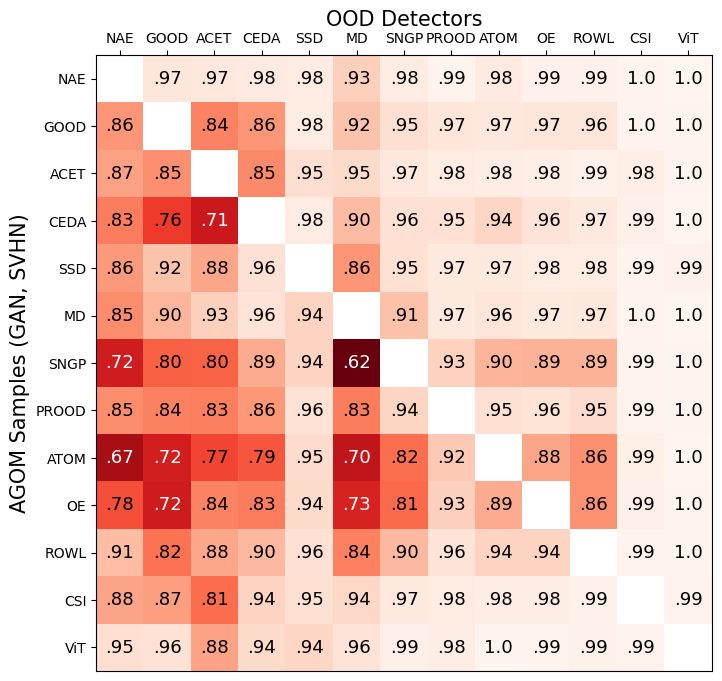

In [38]:
label_font = {'fontsize': 15}

plt.figure(figsize=(8,8))
plt.imshow(masked_mat_svhn, cmap=cmap)
ax = plt.gca()
# plt.colorbar()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(range(len(l_algo)), list(l_algo))
plt.yticks(range(len(l_algo)), list(l_algo))
plt.xlabel('OOD Detectors', fontdict=label_font)
plt.ylabel('AGOM Samples (GAN, SVHN)', fontdict=label_font)

for i in range(len(l_algo)):
    for j in range(len(l_algo)):
        if i != j:
            txt_c = 'w' if masked_mat_svhn[i,j] < 0.73 else 'k'
            s = f'{masked_mat_svhn[i,j]:.2f}'
            s = s[1:] if s != '1.00' else s[:3]
            text = ax.text(j, i, s, ha='center', va='center', color=txt_c, fontdict={'fontsize':13})
plt.savefig('pairwise_gan_svhn.pdf', bbox_inches='tight')

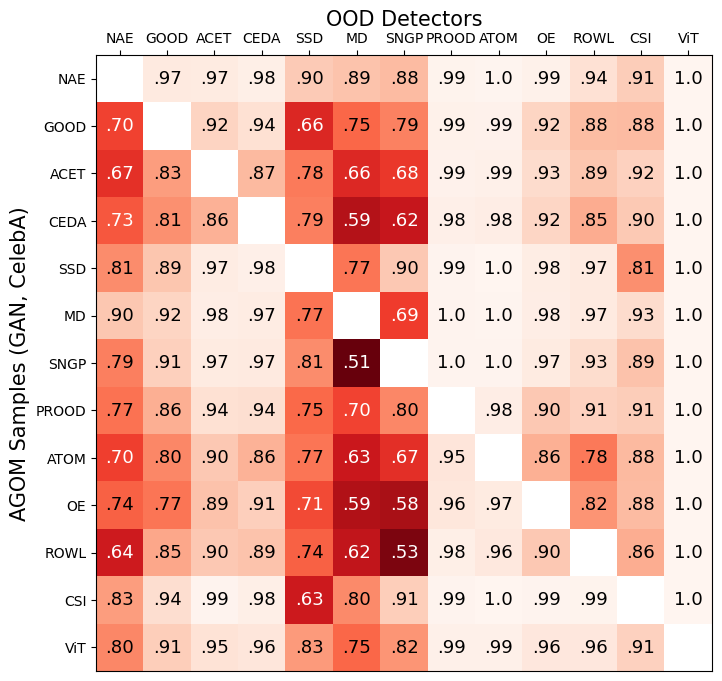

In [41]:
label_font = {'fontsize': 15}

plt.figure(figsize=(8,8))
plt.imshow(masked_mat_celeba, cmap=cmap)
ax = plt.gca()
# plt.colorbar()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(range(len(l_algo)), list(l_algo))
plt.yticks(range(len(l_algo)), list(l_algo))
plt.xlabel('OOD Detectors', fontdict=label_font)
plt.ylabel('AGOM Samples (GAN, CelebA)', fontdict=label_font)

for i in range(len(l_algo)):
    for j in range(len(l_algo)):
        if i != j:
            txt_c = 'w' if masked_mat_celeba[i,j] < 0.73 else 'k'
            s = f'{masked_mat_celeba[i,j]:.2f}'
            s = s[1:] if s != '1.00' else s[:3]
            text = ax.text(j, i, s, ha='center', va='center', color=txt_c, fontdict={'fontsize':13})
plt.savefig('pairwise_gan_celeba.pdf', bbox_inches='tight')

# RImgNet

In [57]:
l_model = ['msp', 'oe', 'prood', 'vit_hf_md']
l_algo = l_model
dataset = 'flowers'
l_data = []
for m1 in l_model:  # detector
    l_row = []
    for m2 in l_model:  # target
        s = f'../results/RImgNet/pairwise/{m1}/{m2}/{dataset}_pgstylegan2_z16_mh/auc.txt'
        f = float(open(s, 'r').read())
        l_row.append(f)
    l_data.append(l_row)
    
df = pd.DataFrame(np.array(l_data).T)
df.columns = l_model
df.index = l_model
mat = df.values
for i in range(len(l_model)):
    mat[i,i] = -1
masked_mat = np.ma.masked_where(mat==-1, mat)
masked_mat_flowers = masked_mat

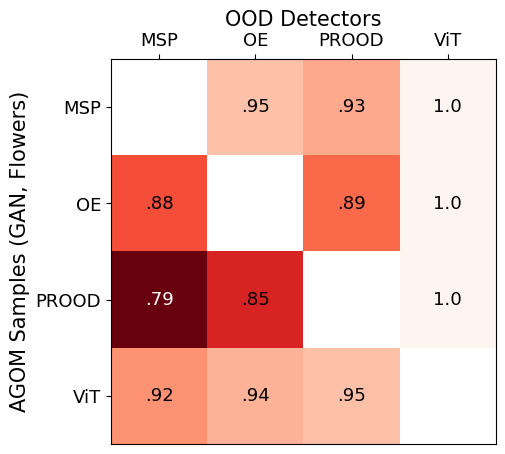

In [58]:
label_font = {'fontsize': 15}
l_algo = ['MSP', 'OE', 'PROOD', 'ViT']
masked_mat = masked_mat_flowers
plt.figure(figsize=(8,5))
plt.imshow(masked_mat, cmap=cmap)
ax = plt.gca()
# plt.colorbar()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.yticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.xlabel('OOD Detectors', fontdict=label_font)
plt.ylabel('AGOM Samples (GAN, Flowers)', fontdict=label_font)

for i in range(len(l_algo)):
    for j in range(len(l_algo)):
        if i != j:
            txt_c = 'w' if masked_mat[i,j] < 0.80 else 'k'
            s = f'{masked_mat[i,j]:.2f}'
            s = s[1:] if s != '1.00' else s[:3]
            text = ax.text(j, i, s, ha='center', va='center', color=txt_c, fontdict={'fontsize':13})
plt.savefig('pairwise_gan_flowers.pdf', bbox_inches='tight')

In [59]:
l_model = ['msp', 'oe', 'prood', 'vit_hf_md']
l_algo = l_model
dataset = 'fgvc'
l_data = []
for m1 in l_model:  # detector
    l_row = []
    for m2 in l_model:  # target
        s = f'../results/RImgNet/pairwise/{m1}/{m2}/{dataset}_pgstylegan2_z16_mh/auc.txt'
        f = float(open(s, 'r').read())
        l_row.append(f)
    l_data.append(l_row)
    
df = pd.DataFrame(np.array(l_data).T)
df.columns = l_model
df.index = l_model
mat = df.values
for i in range(len(l_model)):
    mat[i,i] = -1
masked_mat = np.ma.masked_where(mat==-1, mat)
masked_mat_fgvc = masked_mat

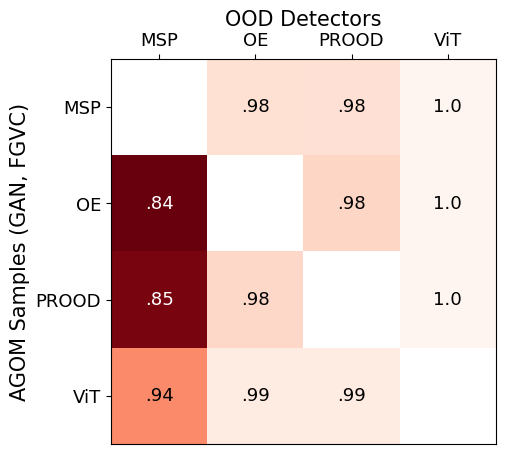

In [63]:
label_font = {'fontsize': 15}
l_algo = ['MSP', 'OE', 'PROOD', 'ViT']
masked_mat = masked_mat_fgvc
plt.figure(figsize=(8,5))
plt.imshow(masked_mat, cmap=cmap)
ax = plt.gca()
# plt.colorbar()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.yticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.xlabel('OOD Detectors', fontdict=label_font)
plt.ylabel('AGOM Samples (GAN, FGVC)', fontdict=label_font)

for i in range(len(l_algo)):
    for j in range(len(l_algo)):
        if i != j:
            txt_c = 'w' if masked_mat[i,j] < 0.86 else 'k'
            s = f'{masked_mat[i,j]:.2f}'
            s = s[1:] if s != '1.00' else s[:3]
            text = ax.text(j, i, s, ha='center', va='center', color=txt_c, fontdict={'fontsize':13})
plt.savefig('pairwise_gan_fgvc.pdf', bbox_inches='tight')

In [61]:
l_model = ['msp', 'oe', 'prood', 'vit_hf_md']
l_algo = l_model
dataset = 'eurosat'
l_data = []
for m1 in l_model:  # detector
    l_row = []
    for m2 in l_model:  # target
        s = f'../results/RImgNet/pairwise/{m1}/{m2}/{dataset}_pgstylegan2_z16_mh/auc.txt'
        f = float(open(s, 'r').read())
        l_row.append(f)
    l_data.append(l_row)
    
df = pd.DataFrame(np.array(l_data).T)
df.columns = l_model
df.index = l_model
mat = df.values
for i in range(len(l_model)):
    mat[i,i] = -1
masked_mat = np.ma.masked_where(mat==-1, mat)
masked_mat_eurosat = masked_mat

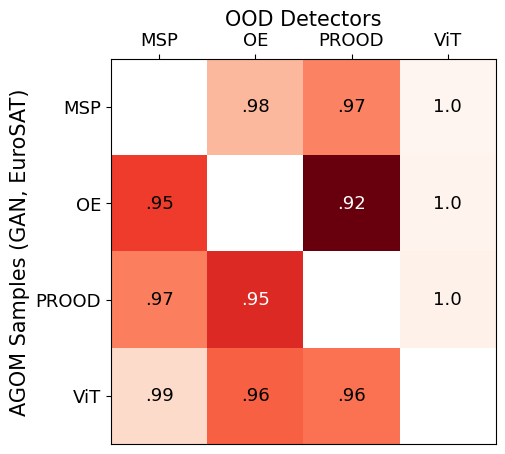

In [64]:
label_font = {'fontsize': 15}
l_algo = ['MSP', 'OE', 'PROOD', 'ViT']
masked_mat = masked_mat_eurosat
plt.figure(figsize=(8,5))
plt.imshow(masked_mat, cmap=cmap)
ax = plt.gca()
# plt.colorbar()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.yticks(range(len(l_algo)), list(l_algo), fontdict={'fontsize':13})
plt.xlabel('OOD Detectors', fontdict=label_font)
plt.ylabel('AGOM Samples (GAN, EuroSAT)', fontdict=label_font)

for i in range(len(l_algo)):
    for j in range(len(l_algo)):
        if i != j:
            txt_c = 'w' if masked_mat[i,j] < 0.95 else 'k'
            s = f'{masked_mat[i,j]:.2f}'
            s = s[1:] if s != '1.00' else s[:3]
            text = ax.text(j, i, s, ha='center', va='center', color=txt_c, fontdict={'fontsize':13})
plt.savefig('pairwise_gan_eurosat.pdf', bbox_inches='tight')